<a href="https://colab.research.google.com/github/nitishkumar34/Hotel-booking-analysis/blob/main/book_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation Project
Recommendation Systems are one of the largest application areas of Machine Learning. They enable tailoring personalized content for users, thereby generating revenue for businesses

There are 2 main types of personalized recommendation systems:
##Collaborative based filtering
Recommendations are based solely on user's past likes/ dislikes & how other users have rated other items. The system does not take into consideration an item's features like author, publisher, genre etc nor a user's features like age, gender, location etc. These take either a memory based approach or a model based approach

**(1)Memory based approach** :Utilizes entire user-item rating information to calculate similarity scores between items or users for making recommendations. These are further either of 2 types:

   **User based**:Two users are considered similar, if they rate items in    a      similar manner. An item is recommended to a user, if another user i.e., similar to the user in question has liked the item

   **Item based**: Two items are considered similar, if users rate them in a similar manner. An item is recommended to a user, that is similar to the items the user has rated in the past

   **(2)Model based approach**: Utilizes user-item rating information to build a model & the model (not the entire dataset) is thereafter used for making recommendations. This approach is preferred in instances where time & scalability are a concern

This project aims to build a recommendation system based on collaborative filtering & will tackle an example of both memory based & model based algorithm

The dataset consists of 3 different tables:

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [ ]:
books = pd.read_csv('Books.csv')
Users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

## Pre-Processing of given Datasets

## Books Dataset

In [ ]:
books.shape

(51132, 8)

In [ ]:
print(list(books.columns))

['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
# some of the year of publication is replaced by names.

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030])

In [ ]:
# Handling non_numeric values
# Using errors=’coerce’. It will replace all non-numeric values with NaN

books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors = 'coerce')

In [ ]:
print(sorted(books['Year-Of-Publication'].unique()))

[0, 1920, 1923, 1925, 1926, 1930, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1945, 1946, 1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2011, 2020, 2030]


In [ ]:
# Filtering invalid year of publications

books.loc[(books['Year-Of-Publication'] > 2021) | (books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.NAN

In [ ]:
# Filling NAN values with mean.

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace = True)

In [ ]:
# Converting dtypes of values into int32

books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(np.int32)

In [ ]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938], dtype=int32)

## User Dataset

In [ ]:
Users.shape

NameError: ignored

In [ ]:
Users1=Users.head(7000)
Users1

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
6995,6996,"french lick, indiana, usa",19.0
6996,6997,"suining, sichuan, china",NaN
6997,6998,"roma, lazio, italy",33.0
6998,6999,"barcelona, barcelona, spain",22.0


In [ ]:

Users1['city1']=Users1['Location'].apply(lambda x: list(pd.Series(str(x).split(","))))


In [ ]:
Users1=Users1[Users1['city1'].apply(len)==3]

In [ ]:
# age ranges from 0 to 244 for user.

print(sorted(Users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [ ]:
# Filtering the age of user

Users.loc[(Users['Age'] > 95) | (Users['Age'] < 5), 'Age'] = np.NAN

In [ ]:
# Filling NAN values with mean.

Users['Age'] = Users['Age'].fillna(Users['Age'].mean())

In [ ]:
# Converting dtypes of values into int32

Users['Age'] = Users['Age'].astype(np.int32)

In [ ]:
print(sorted(Users['Age'].unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


## Ratings Dataset

In [ ]:
ratings.shape

(492084, 3)

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
sorted(ratings['Book-Rating'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, nan]

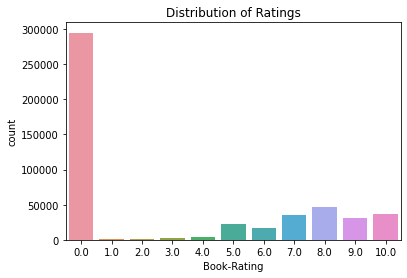

In [ ]:
# visualizing the distributions of ratings

df = pd.DataFrame(ratings['Book-Rating'])

sns.countplot(data = df, x = 'Book-Rating' )
plt.title('Distribution of Ratings')
plt.show()

In [ ]:
# creating a new dataframe by combining ratings and books dataframe by 'ISBN'

new_ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]

In [ ]:
new_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
2,276727,0446520802,0.0
8,276744,038550120X,7.0
10,276746,0425115801,0.0
11,276746,0449006522,0.0


In [ ]:
new_ratings.shape

(243591, 3)

In [ ]:
# Creating a valid ratings dataframe

valid_ratings = new_ratings[new_ratings['Book-Rating'] != 0]

In [ ]:
# creating a new dataframe by combining users and valid_ratings dataframe by 'user-id'

user_ratings = Users[Users['User-ID'].isin(valid_ratings['User-ID'])]

NameError: ignored

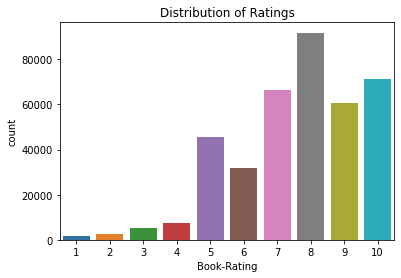

In [ ]:
# Visualzing valid ratings i.e except zero rating

sns.countplot(data = valid_ratings, x = 'Book-Rating' )
plt.title('Distribution of Ratings')
plt.show()

## Collaborative Filtering by K - Nearest Neighbours

kNN is a machine learning algorithm used to find clusters of similar kind based on similar book ratings and make predictions using the average rating of top-k nearest neighbors.

In [ ]:
# Creating dataframe by merging ratings, books dataframe by 'ISBN'

book_rating = pd.merge(ratings, books, on = 'ISBN')
dropping_columns = ['Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
book_rating = book_rating.drop(dropping_columns, axis = 1)

# Keeping columns 'user-id','ISBN', 'Book-Rating', 'Book-Title' 

In [ ]:
book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [ ]:
# Dropping rows with null values

book_rating = book_rating.dropna(axis = 0, subset = ['Book-Title'])

In [ ]:
# Creating a new column 'Total Rating Count' by grouping by book titles and ratings

book_rating_count = (book_rating.groupby(by = ['Book-Title'])['Book-Rating'].count().
                     reset_index().rename(columns = {'Book-Rating' : 'Total_Rating_Count'})
                     [['Book-Title','Total_Rating_Count']]
                    )

In [ ]:
book_rating_count.head()

,Book-Title,Total_Rating_Count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
# merging 'book-rating' & 'book-rating-count' dataframe for considering only popular books

modified_data = book_rating.merge(book_rating_count, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left' )

In [ ]:
modified_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [ ]:
# considering books having minimum total ratings above 100

threshold = 100
popular_books = modified_data.query('Total_Rating_Count >= @threshold')

In [ ]:
popular_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count
62,276727,0446520802,0,The Notebook,650
63,278418,0446520802,0,The Notebook,650
64,638,0446520802,0,The Notebook,650
65,3363,0446520802,0,The Notebook,650
66,7158,0446520802,10,The Notebook,650


In [ ]:
popular_books.shape

(183799, 5)

In [ ]:
# looking for uniques locations in dataset

l = list(user_ratings['Location'].unique())

In [ ]:
# l

## Improvement in model

In [ ]:
# Selecting the users based on there countries
Users[['city','state','country','nan','nan','nan','nan','nan','nan']]=Users['Location'].apply(lambda x: pd.Series(str(x).split(",")))
Users.drop(['Location','nan'],axis=1)
Users_defined = Users
Users_defined

KeyboardInterrupt: ignored

In [ ]:
my_dict=(Users_defined['country'].value_counts()).to_dict()

count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f

,c,count
0,usa,139187
1,canada,21558
2,united kingdom,18286
3,germany,17022
4,spain,13095
5,australia,11723
6,italy,11242
7,,4598
8,france,3442
9,portugal,3306


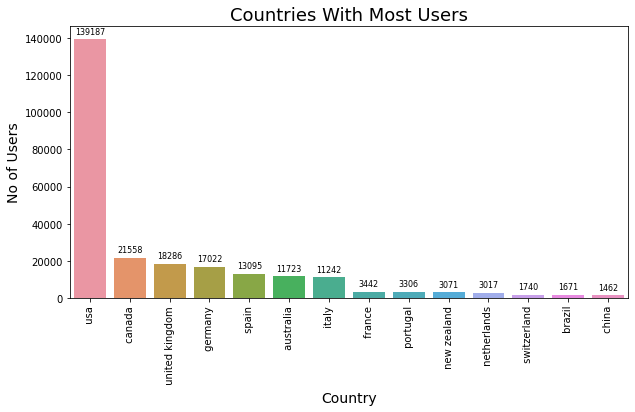

In [ ]:
f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

In [ ]:
# merging 'popular-books' dataframe with 'users' dataframe for getting locations of users.

combined = popular_books.merge(Users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

In [ ]:
# using regular expression for matching string with India and USA.

country_rating = combined[combined['Location'].str.contains('usa|canada|united kingdom|germany|spain|austrailia|italy')]

country_rating = country_rating.drop('Age', axis = 1)
country_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total_Rating_Count,Location,city,state,country,nan
1,278418,0446520802,0,The Notebook,650,"omaha, nebraska, usa",omaha,nebraska,usa,NaN
2,638,0446520802,0,The Notebook,650,"san diego, california, usa",san diego,california,usa,NaN
3,3363,0446520802,0,The Notebook,650,"knoxville, tennessee, usa",knoxville,tennessee,usa,NaN
4,7158,0446520802,10,The Notebook,650,"omaha, nebraska, usa",omaha,nebraska,usa,NaN
5,8253,0446520802,10,The Notebook,650,"tulsa, oklahoma, usa",tulsa,oklahoma,usa,NaN


In [ ]:
from scipy.sparse import csr_matrix

country_rating = country_rating.drop_duplicates(['User-ID','Book-Title'])

# creating a pivot table based on 'book-title' and 'user-id' having 'ratings' as values.

country_rating_pivot = country_rating.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
country_rating_pivot.head(6)

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user = country_rating_pivot.shape[1]
book = country_rating_pivot.shape[0]

print(user, book)

34266 914


In [ ]:
# Creating matrix from pivot table. 
# Ratings are in a matrix form having one row for each book and one column for each user.
# most of the values are zeros.

country_rating_matrix = csr_matrix(country_rating_pivot.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

# using 'cosine' metric for similarity constraint and 'brute' algorithm

model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

# fitting the matrix into knn model
model.fit(country_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Randomly selecting a book based on index number.

# book_name = np.random.choice(country_rating_pivot.shape[0])
print(book_name)

# By using index number finding 10 nearest neighbors using kNN model.

dist, indices = model.kneighbors(country_rating_pivot.iloc[book_name,:].values.reshape(1, -1), n_neighbors = 11)

print(dist)
print(indices)

297
[[4.44089210e-16 8.05322233e-01 8.73990679e-01 9.15563348e-01
  9.19395547e-01 9.19594378e-01 9.27858828e-01 9.28534418e-01
  9.32166968e-01 9.32500287e-01 9.33104019e-01]]
[[297  41 307 383 433  42 479 605 839 849 416]]


In [ ]:
# name of the book

country_rating_pivot.index[book_name]

'High Fidelity'

In [ ]:
# loop for printing recommended book names along with the distance with selected book.
# lesser the distance , more the similarity between books based on ratings.
listofbooks2 = []
listofdistance2 = []

for i in range(0, len(dist.flatten())):
    if i == 0:
        print(f'Recommendations for {country_rating_pivot.index[book_name]}:','\n')
    else:
        print(f'{i}: {country_rating_pivot.index[indices.flatten()[i]]}, with distance of {dist.flatten()[i]}:')
        
        listofbooks2.append(country_rating_pivot.index[indices.flatten()[i]])
        listofdistance2.append(dist.flatten()[i])
        

Recommendations for High Fidelity: 

1: About a Boy, with distance of 0.8053222326595483:
2: How to Be Good, with distance of 0.8739906794392742:
3: Me Talk Pretty One Day, with distance of 0.915563347589336:
4: Notes from a Small Island, with distance of 0.9193955465354122:
5: About a Boy (Movie Tie-In), with distance of 0.9195943775285194:
6: Primary Colors: A Novel of Politics, with distance of 0.9278588278701534:
7: The Beach, with distance of 0.9285344177668884:
8: The World According to Garp, with distance of 0.9321669677950747:
9: To Kill a Mockingbird, with distance of 0.9325002866058714:
10: Naked, with distance of 0.9331040185186043:


In [ ]:
dataf2 = {'Books': listofbooks2, 'Distances': listofdistance2}
db2 = pd.DataFrame(dataf2, index = [i for i in range(1,11)])
db2
# improved suggestions

,Books,Distances
1,About a Boy,0.805322
2,How to Be Good,0.873991
3,Me Talk Pretty One Day,0.915563
4,Notes from a Small Island,0.919396
5,About a Boy (Movie Tie-In),0.919594
6,Primary Colors: A Novel of Politics,0.927859
7,The Beach,0.928534
8,The World According to Garp,0.932167
9,To Kill a Mockingbird,0.932500
10,Naked,0.933104


In [ ]:
# previous suggestions
db1

,Books,Distances
1,About a Boy,0.829169
2,Me Talk Pretty One Day,0.900423
3,How to Be Good,0.911201
4,Bridget Jones's Diary,0.920475
5,About a Boy (Movie Tie-In),0.926733
6,The House on Mango Street (Vintage Contemporar...,0.932362
7,Wicked: The Life and Times of the Wicked Witch...,0.940968
8,To Kill a Mockingbird,0.942361
9,The World According to Garp,0.944226
10,The Handmaid's Tale,0.944536


## Popularity based (Top In a given place)


In [ ]:
# Selecting the users based on there countries
Users1[['city','state','country',]]=Users1['Location'].apply(lambda x: pd.Series(str(x).split(",")))
Users1.drop(['Location',],axis=1)

Users1

,User-ID,Location,Age,city1,city,state,country
0,1,"nyc, new york, usa",NaN,"[nyc, new york, usa]",nyc,new york,usa
1,2,"stockton, california, usa",18.0,"[stockton, california, usa]",stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,"[moscow, yukon territory, russia]",moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,"[porto, v.n.gaia, portugal]",porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,"[farnborough, hants, united kingdom]",farnborough,hants,united kingdom
...,...,...,...,...,...,...,...
6995,6996,"french lick, indiana, usa",19.0,"[french lick, indiana, usa]",french lick,indiana,usa
6996,6997,"suining, sichuan, china",NaN,"[suining, sichuan, china]",suining,sichuan,china
6997,6998,"roma, lazio, italy",33.0,"[roma, lazio, italy]",roma,lazio,italy
6998,6999,"barcelona, barcelona, spain",22.0,"[barcelona, barcelona, spain]",barcelona,barcelona,spain


In [ ]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, Users1, on='User-ID', how='inner')

dataset.head(50)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,city1,city,state,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,"[stockton, california, usa]",stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,8,0,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,"timmins, ontario, canada",NaN,"[timmins, ontario, canada]",timmins,ontario,canada


In [ ]:
## Explicit Ratings Dataset
df1 = dataset[dataset['Book-Rating'] != 0]
df1 = df1.reset_index(drop = True)
df1.shape

(7869, 16)

In [ ]:
df1['country']=df1['country'].str.strip()
df1['state']=df1['state'].str.strip()

In [ ]:
## Implicit Ratings Dataset
df2 = dataset[dataset['Book-Rating'] == 0]
df2 = df2.reset_index(drop = True)
df2.shape

(41, 15)

In [ ]:
def unique_places(df1, place1):
    place1 = place1.lower()
    print(place)

    if place1 in list(df1['city']):
        print("gghh")
        return df1[df1['city'] == place1]
    elif place1 in list(df1['state']):
        print("ggkkh")
        return df1[df1['state'] == place1]
    elif place1 in list(df1['country']):

        return df1[df1['country'] ==place1]
    else:
        return "  Invalid Entry"

In [ ]:
' ontario' in	list(df1['state'])
  


True

In [ ]:
place = input("Enter the name of place: ")



Enter the name of place: usa


In [ ]:
data = unique_places(df1, place)
print(data)

usa
            ISBN                                         Book-Title  \
7     0060973129                               Decision in Normandy   
8     0440235502                              October Sky: A Memoir   
9     0380973499  War's End: An Eyewitness Account of America's ...   
10    031224116X  Murder on the Mauretania (George Porter Dillma...   
11    0385319622          American Chica: Two Worlds, One Childhood   
...          ...                                                ...   
7857  0061099570                              The Crown of Columbus   
7858  0936552034  Animal Talk: Interspecies Telepathic Communica...   
7862  067164257X     GARDEN OF SHADOWS (Dollanger Saga (Paperback))   
7864  1400049520    Slander : Liberal Lies About the American Right   
7865  0886771404                                  The Shapechangers   

               Book-Author Year-Of-Publication                      Publisher  \
7             Carlo D'Este                1991                

In [ ]:
y=data.merge(data.groupby(["Book-Title"]).size().reset_index(name='counts'),on="Book-Title")

In [ ]:
y_sorted=y.sort_values("counts",ascending=False)

In [ ]:
y_reduced=y_sorted[["Book-Title",'counts']]
y_reduced.drop_duplicates(subset ="Book-Title",keep = "first", inplace = True)
recommendation_priority=y_reduced.reset_index()

In [ ]:
# top 10 books to read:
recommendation_priority.head(17)

,index,Book-Title,counts
0,959,The Secret Life of Bees,13
1,715,The Da Vinci Code,12
2,582,The Lovely Bones: A Novel,11
3,2470,Summer Sisters,10
4,1645,Divine Secrets of the Ya-Ya Sisterhood: A Novel,9
5,1376,Life of Pi,8
6,860,Snow Falling on Cedars,8
7,319,Angels &amp; Demons,8
8,394,Wild Animus,7
9,1820,"The Golden Compass (His Dark Materials, Book 1)",7


## Content based filtering 

In [ ]:
x.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication_x,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,Location,Age,city,state,country,nan,Year-Of-Publication_y,Average rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18,stockton,california,usa,NaN,2000.0,3.500000
1,0801319536,Classical Mythology,Mark P. O. Morford,1998,John Wiley &amp; Sons,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,269782,7,"edmonton, alberta, canada",30,edmonton,alberta,canada,NaN,2000.0,3.500000
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34,timmins,ontario,canada,NaN,2001.0,4.928571
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49,ottawa,ontario,canada,NaN,2001.0,4.928571
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",34,n/a,n/a,n/a,NaN,2001.0,4.928571


In [ ]:
x.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication_x',
       'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID',
       'rating', 'Location', 'Age', 'city', 'state', 'country', 'nan',
       'Year-Of-Publication_y', 'Average rating'],
      dtype='object')

In [ ]:
y=x.drop(['Year-Of-Publication_x','Location', 'Age','Year-Of-Publication_y','Publisher'],axis=1)
y.head()

,ISBN,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,city,state,country,nan,Average rating
0,0195153448,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,stockton,california,usa,NaN,3.500000
1,0801319536,Classical Mythology,Mark P. O. Morford,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,http://images.amazon.com/images/P/0801319536.0...,269782,7,edmonton,alberta,canada,NaN,3.500000
2,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,timmins,ontario,canada,NaN,4.928571
3,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0,ottawa,ontario,canada,NaN,4.928571
4,0002005018,Clara Callan,Richard Bruce Wright,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,n/a,n/a,n/a,NaN,4.928571


In [ ]:
popularity_threshold =9
popular_book = y[y['Average rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(22774, 13)

In [ ]:
popular_book.head()

,ISBN,Book-Title,Book-Author,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,rating,city,state,country,nan,Average rating
0,1570624380,Flatland (Shambhala Pocket Classics),EDWIN ABBOTT,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,11676,10,n/a,n/a,n/a,NaN,9.333333
1,1570624380,Flatland (Shambhala Pocket Classics),EDWIN ABBOTT,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,217617,8,cary,illinois,usa,NaN,9.333333
2,1570624380,Flatland (Shambhala Pocket Classics),EDWIN ABBOTT,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,http://images.amazon.com/images/P/1570624380.0...,6894,10,colorado springs,colorado,usa,NaN,9.333333
3,0836217810,We Are Experiencing Parental Difficulties...Pl...,Rick Kirkman,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,11676,10,n/a,n/a,n/a,NaN,9.750000
4,0836217810,We Are Experiencing Parental Difficulties...Pl...,Rick Kirkman,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,http://images.amazon.com/images/P/0836217810.0...,78973,9,amadora,lisboa,portugal,NaN,9.750000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting a collection of raw documents into a matrix of TF-IDF features
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(22774, 86465)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

normalized_df = tfidf_matrix.astype(np.float32)
# assigning similarity score to each term 
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(22774, 22774)

In [ ]:
def contentbased(bookName):

#     bookName="Clara Callan"
    number=5
#     print(f'For reader who read {bookName}\n')
    print("Recommended Books:\n")
    isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
    content = []

    idx = books.index[books['ISBN'] == isbn].tolist()[0]
    similar_indices = cosine_similarities[idx].argsort()[::-1]
    similar_items = []
    for i in similar_indices:
        if books['Book-Title'][i] != bookName and books['Book-Title'][i] not in similar_items and len(similar_items) < number:
            similar_items.append(books['Book-Title'][i])
            content.append(books['Book-Title'][i])
    i=0
    for book in similar_items:
        print(i+1,":",book)
        i=i+1

In [ ]:
contentbased(input("Enter book name : "))

Enter book name : Classical Mythology
Recommended Books:

1 : Clara Callan
2 : Decision in Normandy
3 : An Incomplete Education
4 : CafÃ?Â© Nostalgia
5 : What the Body Remembers: A Novel
